In [39]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [40]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid", palette="muted")
%matplotlib inline

# data cleaning 

In [41]:
# import dataset
train_data = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')
train_data = train_data.join(train_labels['damage_grade'])
train_data = pd.get_dummies(train_data)
dropped_columns = ['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']
train_data = train_data.drop(dropped_columns, axis=1).dropna()
train_data = train_data.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 66 columns):
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
has_superstructure_adobe_mud              260601 non-null int64
has_superstructure_mud_mortar_stone       260601 non-null int64
has_superstructure_stone_flag             260601 non-null int64
has_superstructure_cement_mortar_stone    260601 non-null int64
has_superstructure_mud_mortar_brick       260601 non-null int64
has_superstructure_cement_mortar_brick    260601 non-null int64
has_superstructure_timber                 260601 non-null int64
has_superstructure_bamboo                 260601 non-null int64
has_superstructure_rc_non_engineered      260601 non-null int64
has_superstructure_rc_engineered          260601 non-null

/home/fztso1/IzODA/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


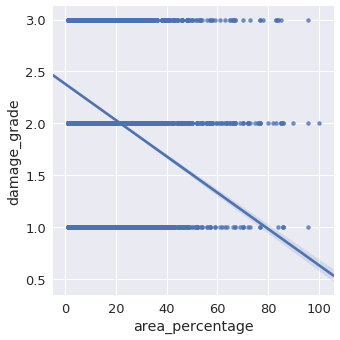

In [43]:
plt.figure(figsize=(10, 8));
sns.set(font_scale = 1.3);
sns.lmplot(x = 'area_percentage', y = 'damage_grade', scatter_kws = {'s': 20}, data = train_data, fit_reg = True);

In [44]:
# removing outliers 
len(train_data["age"][train_data["age"] > 300]) / len(train_data["age"])
len(train_data["area_percentage"][train_data["area_percentage"] > 70]) / len(train_data["area_percentage"])
train_data = train_data[train_data["age"] < 500]
train_data = train_data[train_data["area_percentage"] < 70]

0.0053338245056619125

0.0001650032041319872

In [45]:
X = train_data.drop('damage_grade', axis=1)
y = train_data['damage_grade']

# EDA

/home/fztso1/IzODA/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


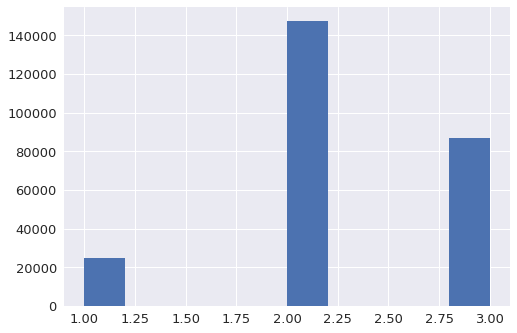

In [46]:
plt.hist(y);

In [47]:
# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.5)]
X = X.drop(X[to_drop], axis=1)
X = StandardScaler().fit_transform(X)

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
count_floors_pre_eq,NaN,0.298871,0.102500,0.772574,0.174522,0.025574,0.040479,0.010954,0.256360,0.086282,...,0.016418,0.002668,0.001167,0.033378,0.003274,0.005249,0.096731,0.008249,0.073215,0.006977
age,NaN,NaN,0.028341,0.204931,0.209188,0.014881,0.013141,0.040936,0.271969,0.122361,...,0.015270,0.002292,0.003113,0.013718,0.004630,0.009690,0.081823,0.000764,0.053382,0.016165
area_percentage,NaN,NaN,NaN,0.199069,0.026623,0.229176,0.000797,0.075995,0.055200,0.212978,...,0.021859,0.003714,0.036760,0.017057,0.019834,0.098005,0.029444,0.015453,0.030276,0.003224
height_percentage,NaN,NaN,NaN,NaN,0.149157,0.105481,0.019629,0.013326,0.208075,0.001232,...,0.015131,0.002750,0.006677,0.016750,0.000053,0.006013,0.078773,0.008861,0.063064,0.000826
has_superstructure_adobe_mud,NaN,NaN,NaN,NaN,NaN,0.305715,0.007370,0.014516,0.315086,0.037500,...,0.004290,0.001525,0.002773,0.017051,0.005451,0.018995,0.030304,0.025070,0.004388,0.032828
has_superstructure_mud_mortar_stone,NaN,NaN,NaN,NaN,NaN,NaN,0.033541,0.104388,0.376099,0.471076,...,0.012889,0.000031,0.020922,0.050708,0.017709,0.098417,0.139208,0.048189,0.127110,0.003698
has_superstructure_stone_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035989,0.033175,0.043615,...,0.000803,0.000528,0.005616,0.011810,0.003624,0.009627,0.010453,0.004876,0.007004,0.005419
has_superstructure_cement_mortar_stone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001560,0.078963,...,0.000436,0.001651,0.005936,0.012592,0.006115,0.020793,0.006984,0.006444,0.000382,0.005891
has_superstructure_mud_mortar_brick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030692,...,0.012948,0.000740,0.004448,0.006126,0.001938,0.040966,0.019183,0.027829,0.000637,0.007873
has_superstructure_cement_mortar_brick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.008626,0.000167,0.015367,0.029733,0.016100,0.093886,0.076759,0.004972,0.052875,0.014154


In [49]:
X.shape

(259161, 44)

# feature engineering 

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
clf = RandomForestClassifier(n_estimators=100, criterion='entropy').fit(X_train, y_train)

feature_imp = pd.Series(clf.feature_importances_,
                        index=train_data.drop(to_drop, axis=1).drop('damage_grade', axis=1).columns).sort_values(ascending=False)

/home/fztso1/IzODA/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/fztso1/IzODA/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


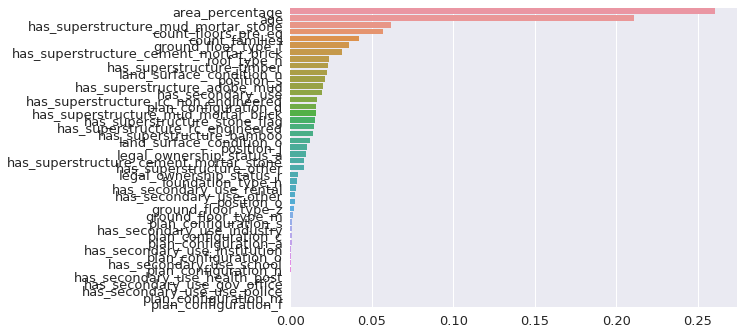

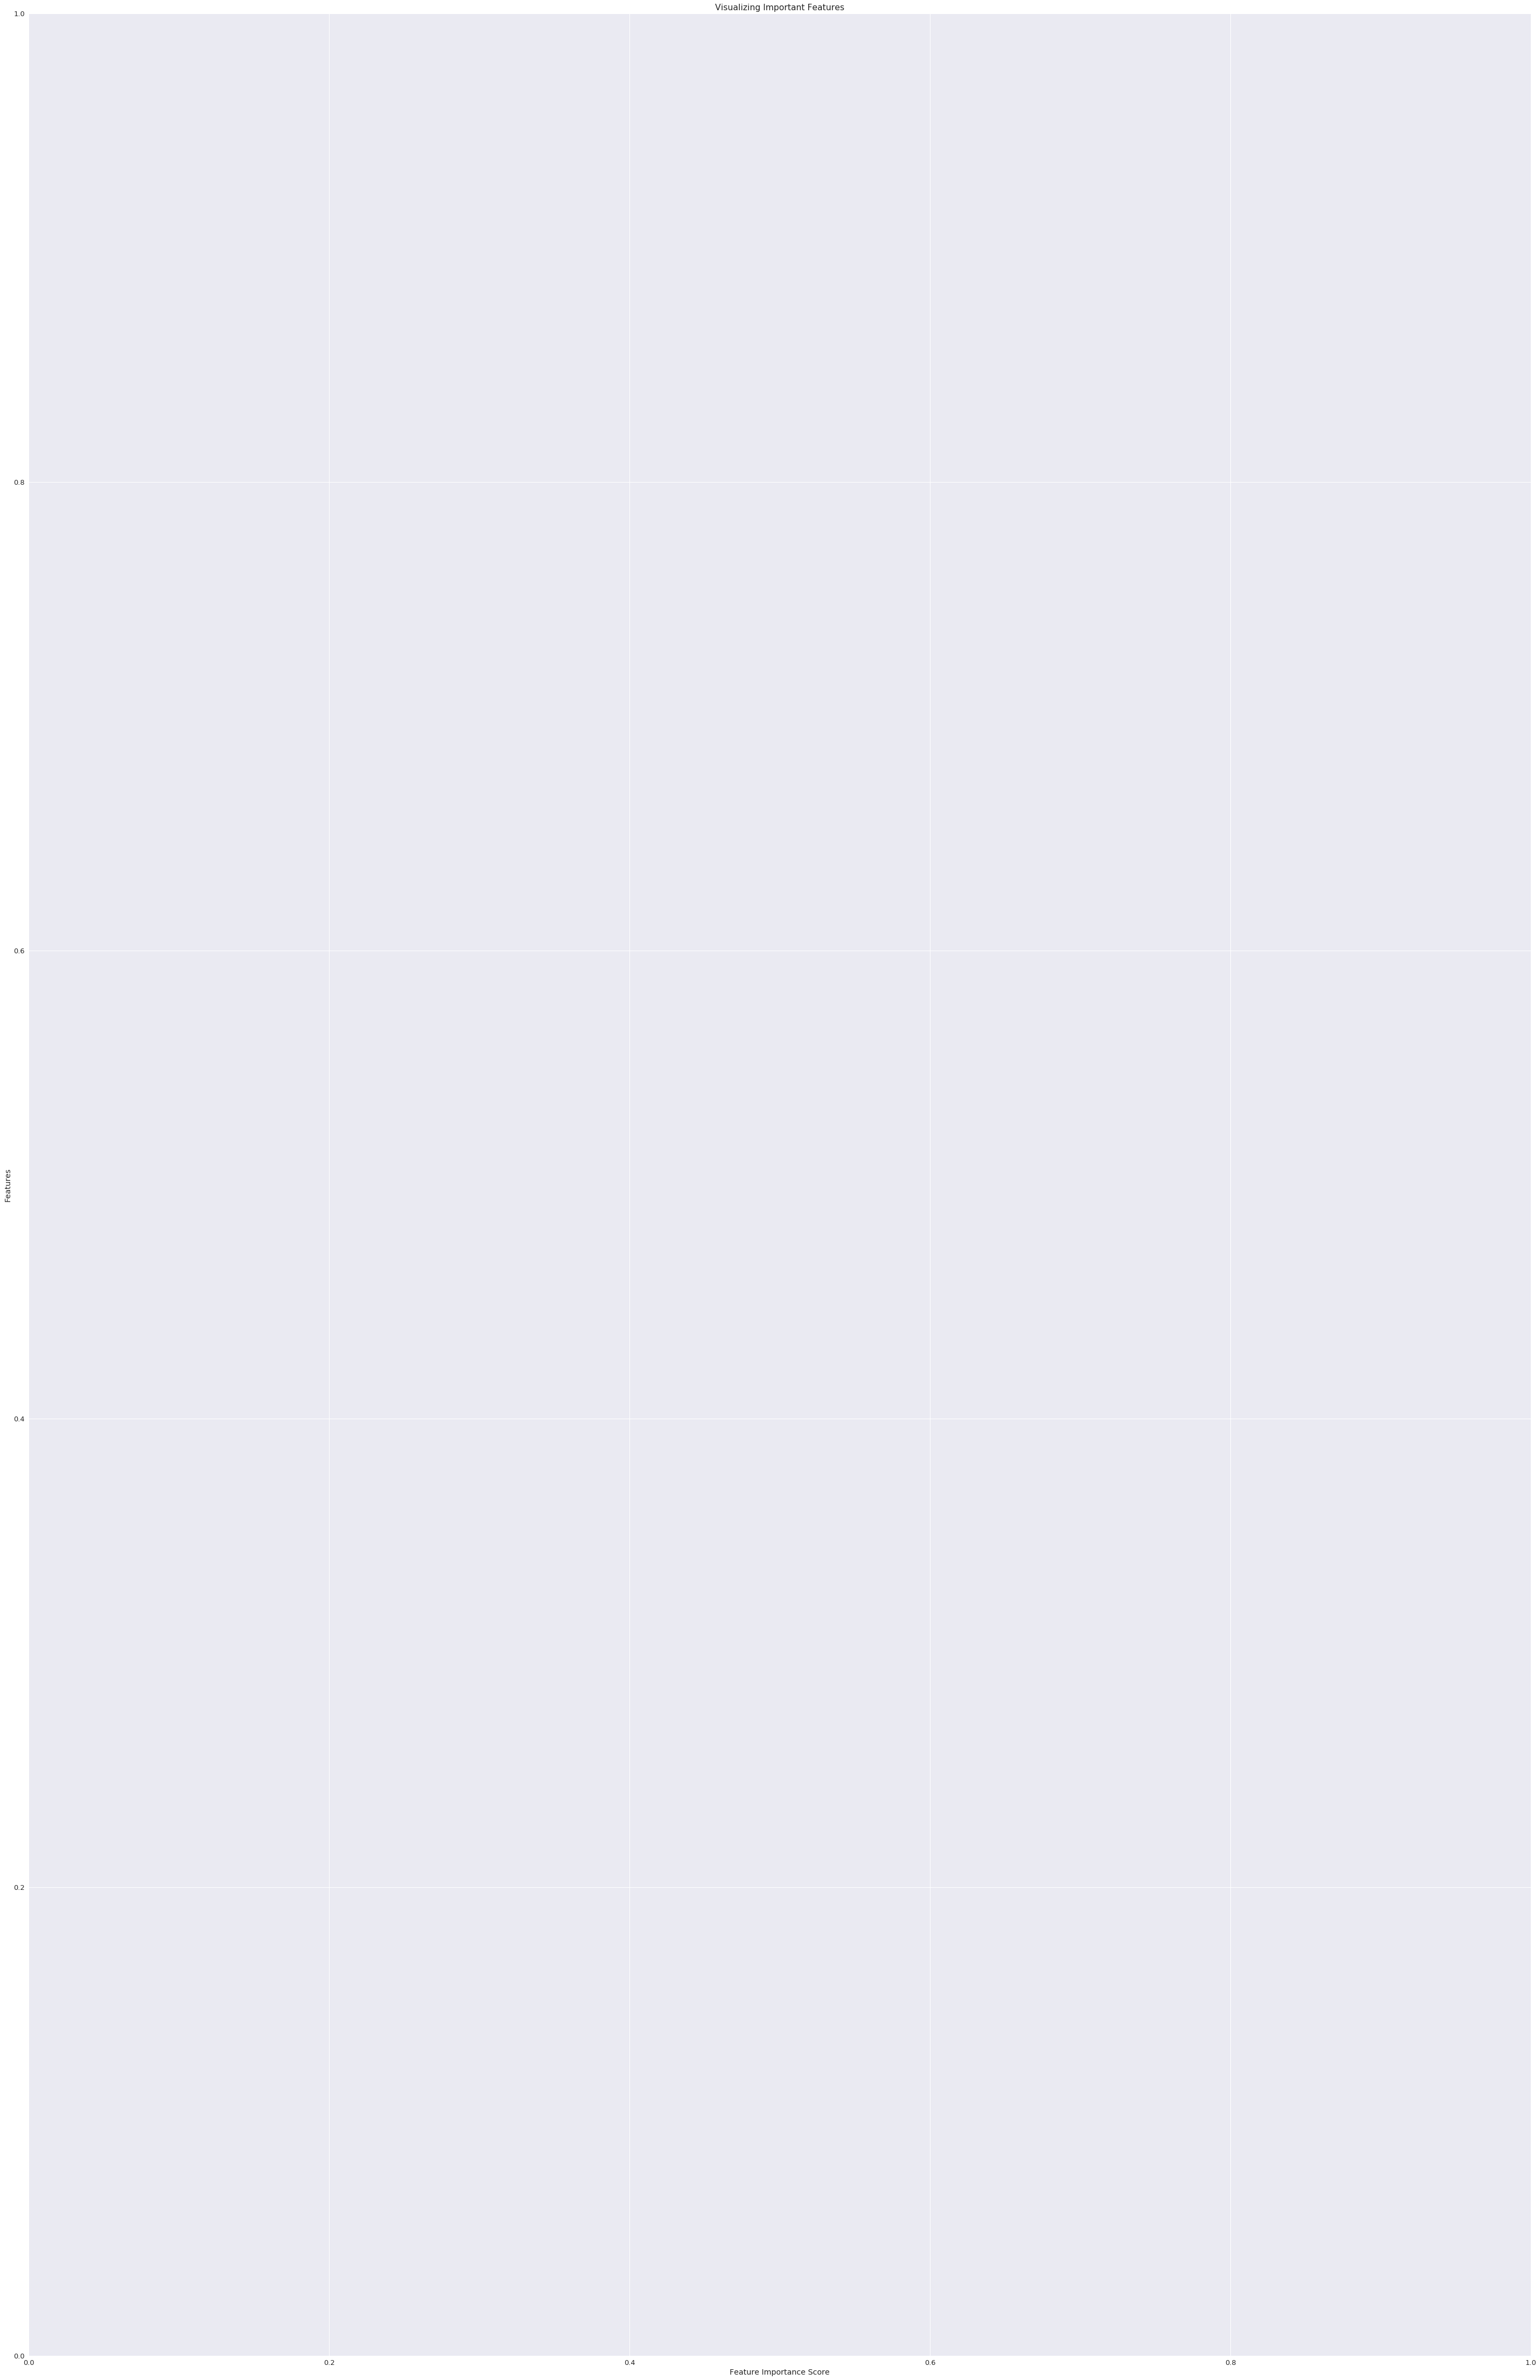

In [66]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.figure(figsize=(50, 80))
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show();

In [56]:
clf.feature_importances_

array([  5.68321365e-02,   2.10765933e-01,   2.60794652e-01,
         2.00333553e-02,   6.16359349e-02,   1.51742413e-02,
         8.65532493e-03,   1.56190714e-02,   3.19108545e-02,
         2.33401630e-02,   1.42694798e-02,   1.65648867e-02,
         1.46720922e-02,   8.29539350e-03,   4.22543076e-02,
         1.92540075e-02,   3.86183458e-03,   7.57083448e-04,
         3.52416590e-04,   1.07197988e-03,   1.69349742e-04,
         1.44403318e-04,   1.28565839e-04,   3.03409652e-03,
         2.27446740e-02,   1.21047888e-02,   4.02382266e-03,
         2.36970315e-02,   3.58905400e-02,   1.57979120e-03,
         2.20908729e-03,   1.02198903e-02,   2.69358421e-03,
         2.12078040e-02,   7.98881693e-04,   9.45273411e-04,
         1.59626986e-02,   7.44434410e-05,   8.25073339e-05,
         2.10273413e-04,   5.84036062e-04,   1.15644944e-03,
         9.49524306e-03,   4.72761505e-03])

# modeling

In [57]:
keep = feature_imp[:10]
keep = list(keep.index)

In [ ]:
sns.barplot(x=feature_imp[:10], y=feature_imp[:10].index)
# Add labels to your graph
plt.figure(figsize=(50, 100))
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [58]:
X = train_data.drop('damage_grade', axis=1)
y = train_data['damage_grade'].replace(2, 1).replace(3, 2).replace(4, 2).replace(5, 3)

In [59]:
# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.5)]
X = X.drop(X[to_drop], axis=1)
X = X.loc[:, keep]
X = StandardScaler().fit_transform(X)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
clf1 = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy'), n_estimators=100)
clf2 = RandomForestClassifier(n_estimators=100, criterion='entropy')
clf3 = MLPClassifier(activation='logistic')

eclf1 = VotingClassifier(estimators=[('ada', clf1), ('rf', clf2), ('mlp', clf3)], voting='hard').fit(X_train, y_train)
eclf1.score(X_train, y_train)

0.71845578021299583

In [64]:
print(classification_report(y_train, eclf1.predict(X_train), target_names=['1', '2', '3']))


             precision    recall  f1-score   support

          1       0.72      0.93      0.82    137884
          2       0.69      0.29      0.41     69444

avg / total       0.71      0.72      0.68    207328



In [65]:
print(classification_report(y_test, eclf1.predict(X_test), target_names=['1', '2', '3']))

             precision    recall  f1-score   support

          1       0.69      0.89      0.78     34459
          2       0.49      0.20      0.29     17374

avg / total       0.62      0.66      0.61     51833

